In [2]:
from myutils.img_loader import get_img_by_id

In [3]:
test_img = get_img_by_id(1)

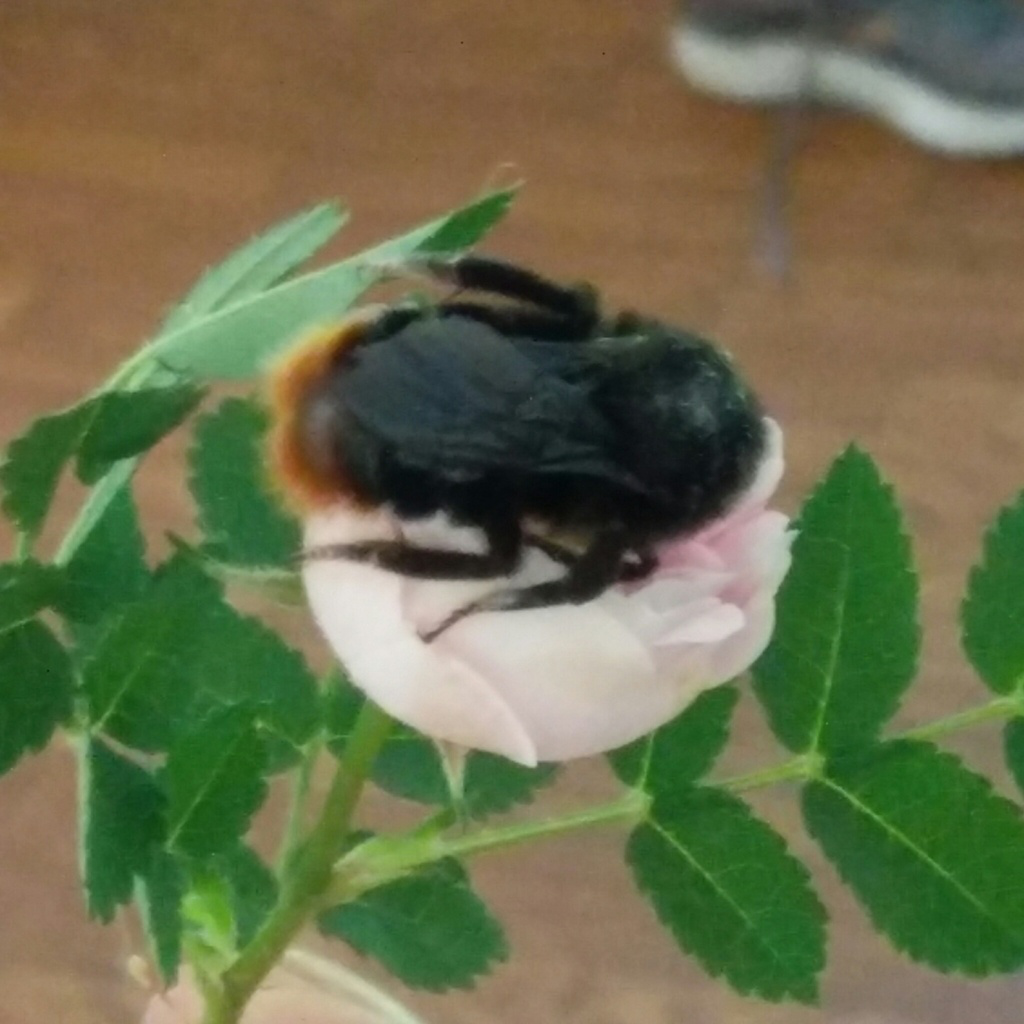

In [4]:
test_img

In [5]:
from myutils.img_loader import get_img_by_id

test_mask = get_img_by_id(1, "./dataset/masks/gt/")
import numpy as np

test_mask = np.array(test_mask)
type(test_mask)
test_mask.shape

from myutils.processors import savePic

savePic(test_mask, "./dataset/test/", "savePic_Test.png")

In [6]:
test_mask[0][0]

0

<PIL.PngImagePlugin.PngImageFile image mode=1 size=1024x1024 at 0x25B32A731D0>
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


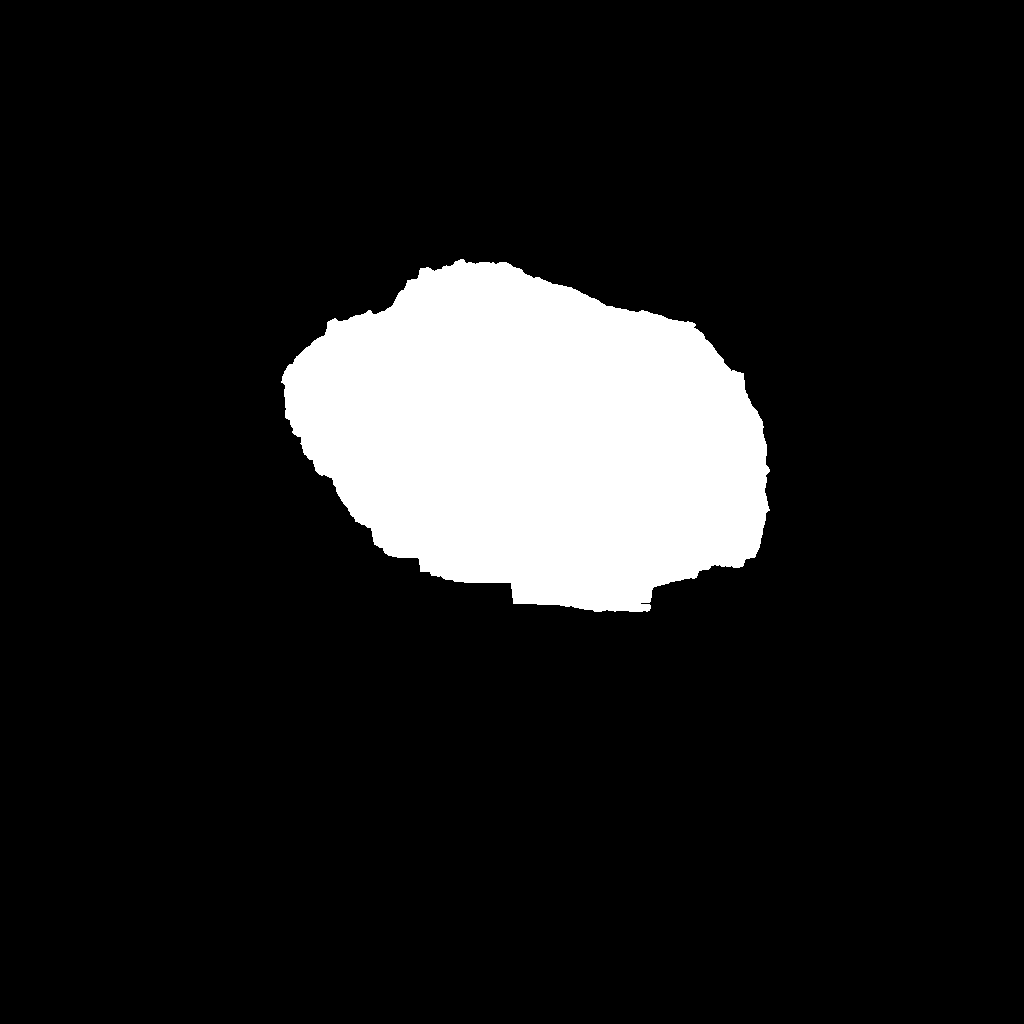

In [8]:
test_img_mask_clip = get_img_by_id(1, "./dataset/masks/clipseg/0.8/", "png")
print(test_img_mask_clip)
import numpy as np

arr = np.asarray(test_img_mask_clip)
print(arr)
test_img_mask_clip

In [21]:
test_img_mask_dss = get_img_by_id(1, "./dataset/masks/dss/0/0.2/", "png")
print(test_img_mask_dss)
arr = np.asarray(test_img_mask_dss)
print(arr)

<PIL.PngImagePlugin.PngImageFile image mode=1 size=1024x1024 at 0x27E3604D8D0>
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [57]:
from torch import tensor
from torchmetrics.classification import BinaryJaccardIndex

target = tensor([[1, 1, 1, 0], [1, 1, 1, 0]])
preds = tensor([[1, 1, 0.2, 0], [1, 1, 1, 0]])
metric = BinaryJaccardIndex()
metric(preds, target)

tensor(0.8333)

### pred to greyscale methods

In [1]:
from myutils.getPred import seg_clipseg
from myutils.img_loader import get_img_by_id

In [2]:
# First Get a prediction
img_id = 100

ori = get_img_by_id(img_id)
pred = seg_clipseg(ori, prompts=["bee", "background"])
gt = get_img_by_id(img_id, "./dataset/masks/gt/")

In [3]:
from myutils.processors import toGreyscale, toBinary

In [4]:
# Min-Max
gs_minmax = toGreyscale(pred)
# Sigmoid
gs_sigmoid = toGreyscale(pred, method=2)

Text(0.5, 1.0, 'Histogram Comparison')

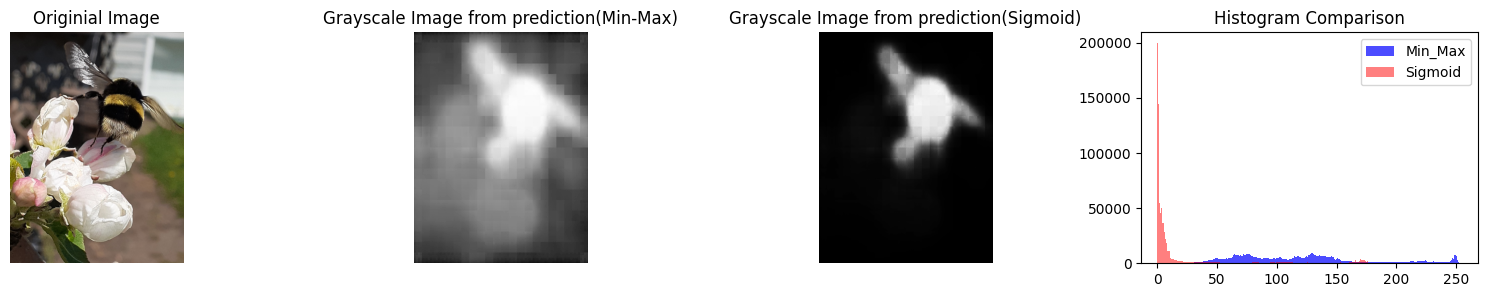

In [5]:
# First Get a prediction
img_id = 170

ori = get_img_by_id(img_id)
pred = seg_clipseg(ori, prompts=["bee", "background"])
gt = get_img_by_id(img_id, "./dataset/masks/gt/")

gs_minmax = toGreyscale(pred[0], method=1)
gs_sigmoid = toGreyscale(pred[0], method=2)

# Comparision
import numpy as np
import matplotlib.pyplot as plt


bins = np.arange(256)
val_range = (0, 255)

hist1, bins1 = np.histogram(gs_minmax.flatten(), bins=256, range=[0, 256])
hist2, bins2 = np.histogram(gs_sigmoid.flatten(), bins=256, range=[0, 256])

fig, axs = plt.subplots(1, 4, figsize=(20, 3))

axs[0].imshow(ori)
axs[0].axis("off")
axs[0].set_title("Originial Image")

axs[1].imshow(gs_minmax, cmap="gray")
axs[1].axis("off")
axs[1].set_title("Grayscale Image from prediction(Min-Max)")

axs[2].imshow(gs_sigmoid, cmap="gray")
axs[2].axis("off")
axs[2].set_title("Grayscale Image from prediction(Sigmoid)")

width = bins1[1] - bins1[0]
axs[3].bar(bins1[:-1], hist1, width=width, color="blue", alpha=0.7, label="Min_Max")
axs[3].bar(bins2[:-1], hist2, width=width, color="red", alpha=0.5, label="Sigmoid")
axs[3].legend(loc="upper right")
axs[3].set_title("Histogram Comparison")

Threshold: 149.0


C:\Users\yitao\AppData\Local\Temp\ipykernel_9868\1701552509.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


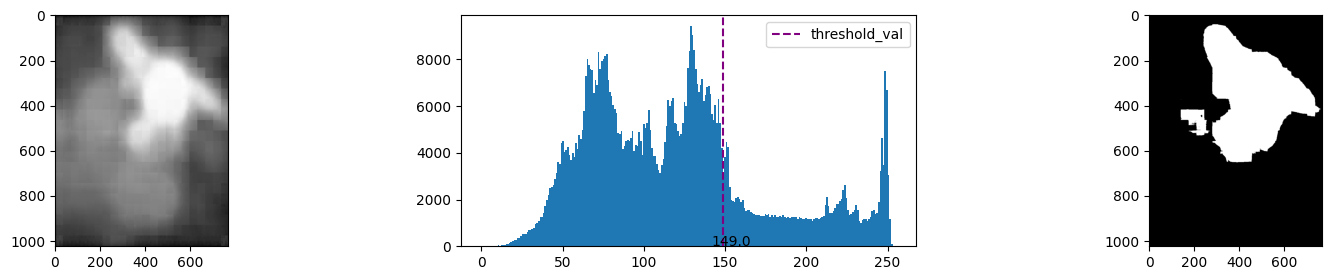

In [33]:
thr, bi_img = toBinary(gs_minmax, mode=2)

print("Threshold: {}".format(thr))

plt.subplots(figsize=(20, 3))
plt.subplot(131)
plt.imshow(gs_minmax, cmap="gray")
plt.subplot(132)
plt.axvline(x=thr, color="purple", linestyle="--", label="threshold_val")
plt.legend(loc="upper right")
plt.text(thr + 5, plt.ylim()[1] * 0.95, str(thr), color="black", ha="center")
plt.hist(gs_minmax.flatten(), bins=256, range=(0, 255))
plt.subplot(133)
plt.imshow(bi_img, cmap="gray")
plt.show()

Threshold: 68.0


C:\Users\yitao\AppData\Local\Temp\ipykernel_9868\1396668340.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


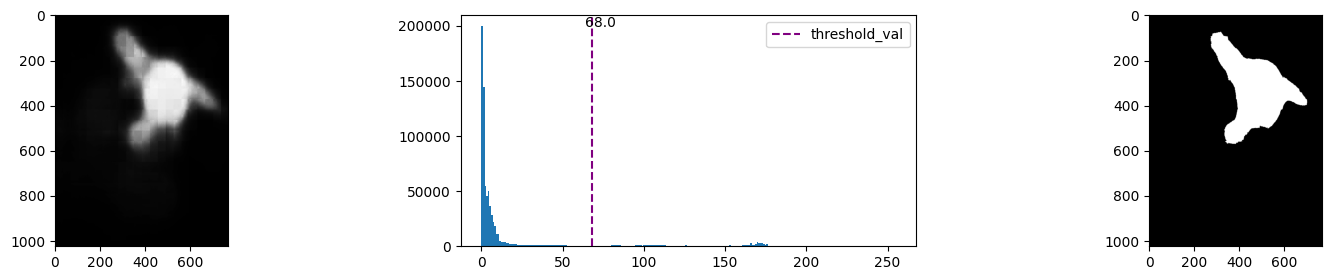

In [34]:
thr, bi_img = toBinary(gs_sigmoid, mode=2)

print("Threshold: {}".format(thr))

plt.subplots(figsize=(20, 3))
plt.subplot(131)
plt.imshow(gs_sigmoid, cmap="gray")
plt.subplot(132)
plt.hist(gs_sigmoid.flatten(), bins=256, range=(0, 255))
plt.axvline(x=thr, color="purple", linestyle="--", label="threshold_val")
plt.legend(loc="upper right")
plt.text(thr + 5, plt.ylim()[1] * 0.95, str(thr), color="black", ha="center")
plt.subplot(133)
plt.imshow(bi_img, cmap="gray")
plt.show()

In [109]:
gs_minmax

tensor([[ 9,  9, 10,  ..., 23, 21, 20],
        [ 9, 10, 11,  ..., 23, 22, 21],
        [10, 11, 13,  ..., 23, 22, 22],
        ...,
        [31, 31, 30,  ..., 29, 27, 26],
        [29, 29, 28,  ..., 28, 26, 24],
        [29, 28, 27,  ..., 28, 25, 24]])

### Greyscale to Binary

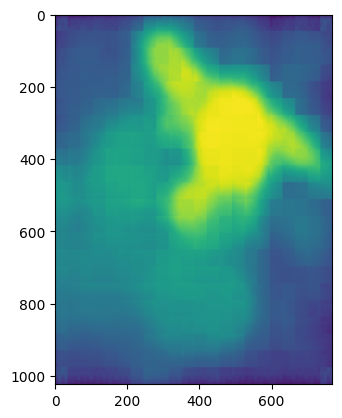

In [113]:
plt.imshow(pred[0])

In [ ]:
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

C:\Users\yitao\AppData\Local\Temp\ipykernel_9868\1790684520.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4,i+1)


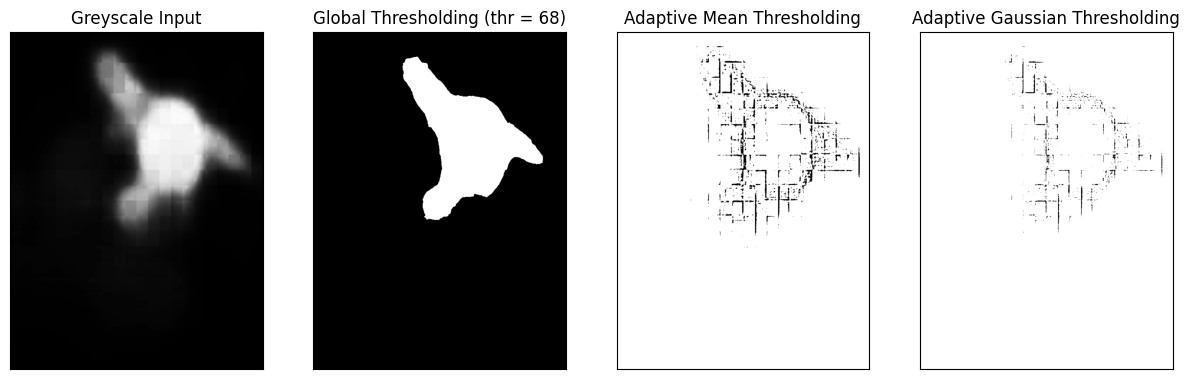

In [134]:
import cv2 as cv

img = gs_sigmoid.numpy().astype(np.uint8)

img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,68,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)
titles = ['Greyscale Input', 'Global Thresholding (thr = 68)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.subplots(figsize=(15, 5))
for i in range(4):
 
 plt.subplot(1, 4,i+1)
 plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [78]:
import torch
import cv2


def otsu_thresholding(img_gs):
    # 将 Tensor 转为 NumPy 数组
    img_np = img_gs.numpy().astype(np.uint8)

    # 使用 Otsu's 阈值法
    _, img_thresh = cv2.threshold(img_np, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return torch.from_numpy(img_thresh).long()

In [79]:
otsu_thresholding(gs_minmax)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [70]:
unique_elements = np.unique(otsu_thresholding(gs_minmax))
print(unique_elements)

[0 1]


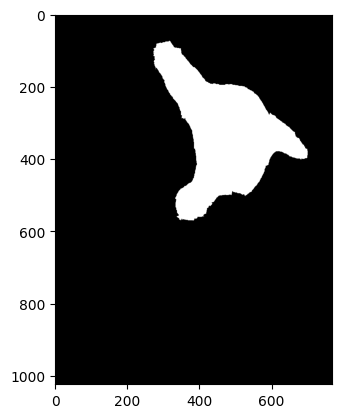

In [71]:
plt.imshow(otsu_thresholding(gs_sigmoid), cmap="gray")
plt.show()

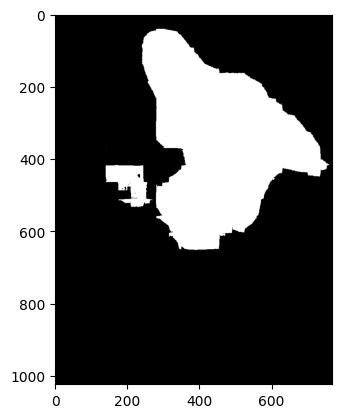

In [72]:
plt.imshow(otsu_thresholding(gs_minmax), cmap="gray")
plt.show()

### Get Score

In [ ]:
# CLIPSEG
for name in img_names:
    gt = toTensor(get_img_by_name(name, GT_PATH).squeeze(0))

    for i in range(PREDS_LENGTH):
        path = CLIP_PATH + str(i) + name + ".pt"
        pred = torch.load(path)
        for t in threshold_values:
            iou = metric_biJ(pred, gt.long())
            ap = metric_biAP(pred, gt.long())

In [35]:
import numpy as np
import torch
import torchvision.transforms as transforms
from torchmetrics.classification import BinaryJaccardIndex, BinaryAveragePrecision
import pandas as pd

from myutils.img_loader import get_img_by_name, get_imgNames

# Load ground truth
PREDS_PATH = "../dataset/preds/"
GT_PATH = "../dataset/masks/gt/"
CLIP_PATH = PREDS_PATH + "clipseg/"
DSS_PATH = PREDS_PATH + "dss/"
RESULTS_PATH = "../results/"
PREDS_LENGTH = 5

toTensor = transforms.ToTensor()

# Load img_names
img_names = get_imgNames()

# generates threshold values for global thresholding
n_values = 51
threshold_values = np.linspace(0, 1, n_values)[1:-1]

# Torch metrics
metric_biJ = BinaryJaccardIndex()
metric_biAP = BinaryAveragePrecision()

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [51]:
test_img = get_img_by_id(300)
preds = seg_clipseg(test_img)
gs_minmax_test_img = toGreyscale(preds[0])
gs_sigmoid_test_img = toGreyscale(preds[0], method=2)
_, bi_test_img_minmax_otsu = toBinary(gs_minmax_test_img, mode=2)
bi_test_img_minmax_fixed = toBinary(gs_minmax_test_img, 0.8)
_, bi_test_img_sigmoid_otsu = toBinary(gs_sigmoid_test_img, mode=2)
bi_test_img_sigmoid_fixed = toBinary(gs_sigmoid_test_img, 0.3)

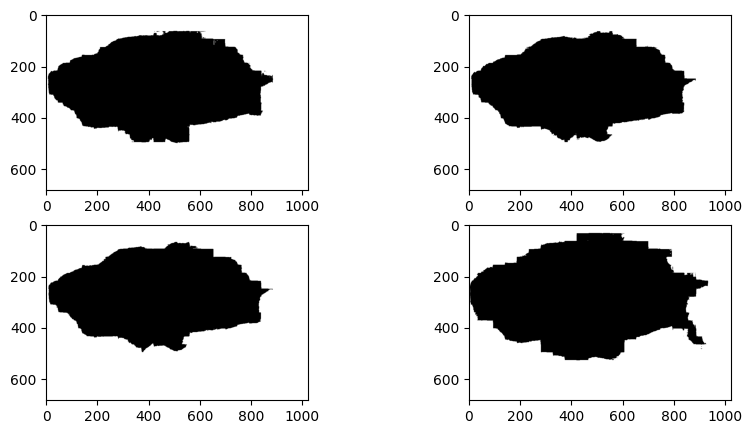

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))  # 2行2列

# axs是一个2x2的数组，可以用它来访问每一个子图
# 例如：
axs[0, 0].imshow(bi_test_img_minmax_otsu, cmap="binary")
axs[0, 1].imshow(bi_test_img_minmax_fixed, cmap="binary")
axs[1, 0].imshow(bi_test_img_sigmoid_otsu, cmap="binary")
axs[1, 1].imshow(bi_test_img_sigmoid_fixed, cmap="binary")

In [58]:
bi_test_img_minmax_otsu

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [68]:
import numpy as np

In [96]:
gt = torch.from_numpy(np.array(get_img_by_id(300, "./dataset/masks/gt/").convert('1'))).long()

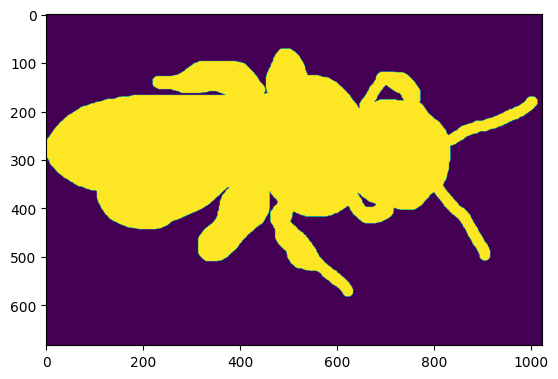

In [97]:
plt.imshow(gt)

In [98]:
metric_biJ(bi_test_img_minmax_otsu, gt)

tensor(0.8075)

In [99]:
metric_biJ(bi_test_img_sigmoid_otsu, gt)

tensor(0.8210)

In [103]:
metric_biAP(gs_sigmoid_test_img / 255, gt)

tensor(0.9625)

In [104]:
metric_biAP(gs_minmax_test_img / 255, gt)

tensor(0.9623)

In [105]:
metric_biAP_t05 = BinaryAveragePrecision(thresholds=5)

In [106]:
metric_biAP_t05(gs_sigmoid_test_img / 255, gt)

tensor(0.8861)

In [107]:
metric_biAP_t05(gs_minmax_test_img / 255, gt)

tensor(0.7744)

In [ ]:
ious = []
aps = []
for t in threshold_values:
    iou = metric_biJ(pred, gt)
    ap = metric_biAP(pred, gt)